In [161]:
import pandas as pd

import numpy as np

df = pd.read_csv('ML-EdgeIIoT-dataset.csv', low_memory=False)

In [162]:
df.head(5)

print(df['Attack_type'].value_counts())

Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: Attack_type, dtype: int64


In [163]:
from sklearn.utils import shuffle

drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

df.isna().sum()

print(df['Attack_type'].value_counts())

Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: Attack_type, dtype: int64


In [165]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

In [166]:
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,dns.qry.name.len-_googlecast._tcp.local,mqtt.conack.flags-0,mqtt.conack.flags-0.0,mqtt.conack.flags-0x00000000,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
114288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.912800e+05,2.372116e+09,...,0,1,0,0,1,0,0,1,0,0
34553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,4.191680e+08,...,0,0,1,0,0,1,0,0,1,0
46884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.668702e+09,1.668702e+09,...,0,0,1,0,0,1,0,0,1,0
69434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.919750e+09,1.919750e+09,...,0,0,1,0,0,1,0,0,1,0
64539,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130815,0.0,0.0,0.0,46640.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,0,0,1,0,0,1,0,0,1,0
54443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.210000e+02,1.153895e+08,...,0,0,1,0,0,1,0,0,1,0
15421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,4.061894e+09,...,0,0,1,0,0,1,0,0,1,0
4370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,1.013594e+09,...,0,0,1,0,0,1,0,0,1,0


In [167]:
df = df[~(df['Attack_type'] == 'DDoS_HTTP')]

In [169]:
df = df[~(df['Attack_type'] == 'DDoS_TCP')]

In [171]:
df = df[~(df['Attack_type'] == 'Fingerprinting')]
df = df[~(df['Attack_type'] == 'Password')]
df = df[~(df['Attack_type'] == 'Uploading')]

In [172]:
df['Attack_type'].value_counts()

Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
SQL_injection            10282
Vulnerability_scanner    10062
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
MITM                       358
Name: Attack_type, dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110415 entries, 114288 to 4370
Data columns (total 76 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   arp.opcode                                                                         110415 non-null  float64
 1   arp.hw.size                                                                        110415 non-null  float64
 2   icmp.checksum                                                                      110415 non-null  float64
 3   icmp.seq_le                                                                        110415 non-null  float64
 4   icmp.unused                                                                        110415 non-null  float64
 5   http.content_length                                                                110415 

In [174]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'icmp.unused',
 'http.content_length',
 'http.response',
 'http.tls_port',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.qry.type',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msg_decoded_as',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-TRACE',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }',
 'htt

In [175]:
len(feat_cols)

75

In [176]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [177]:
from matplotlib import pyplot as plt
import seaborn as sns

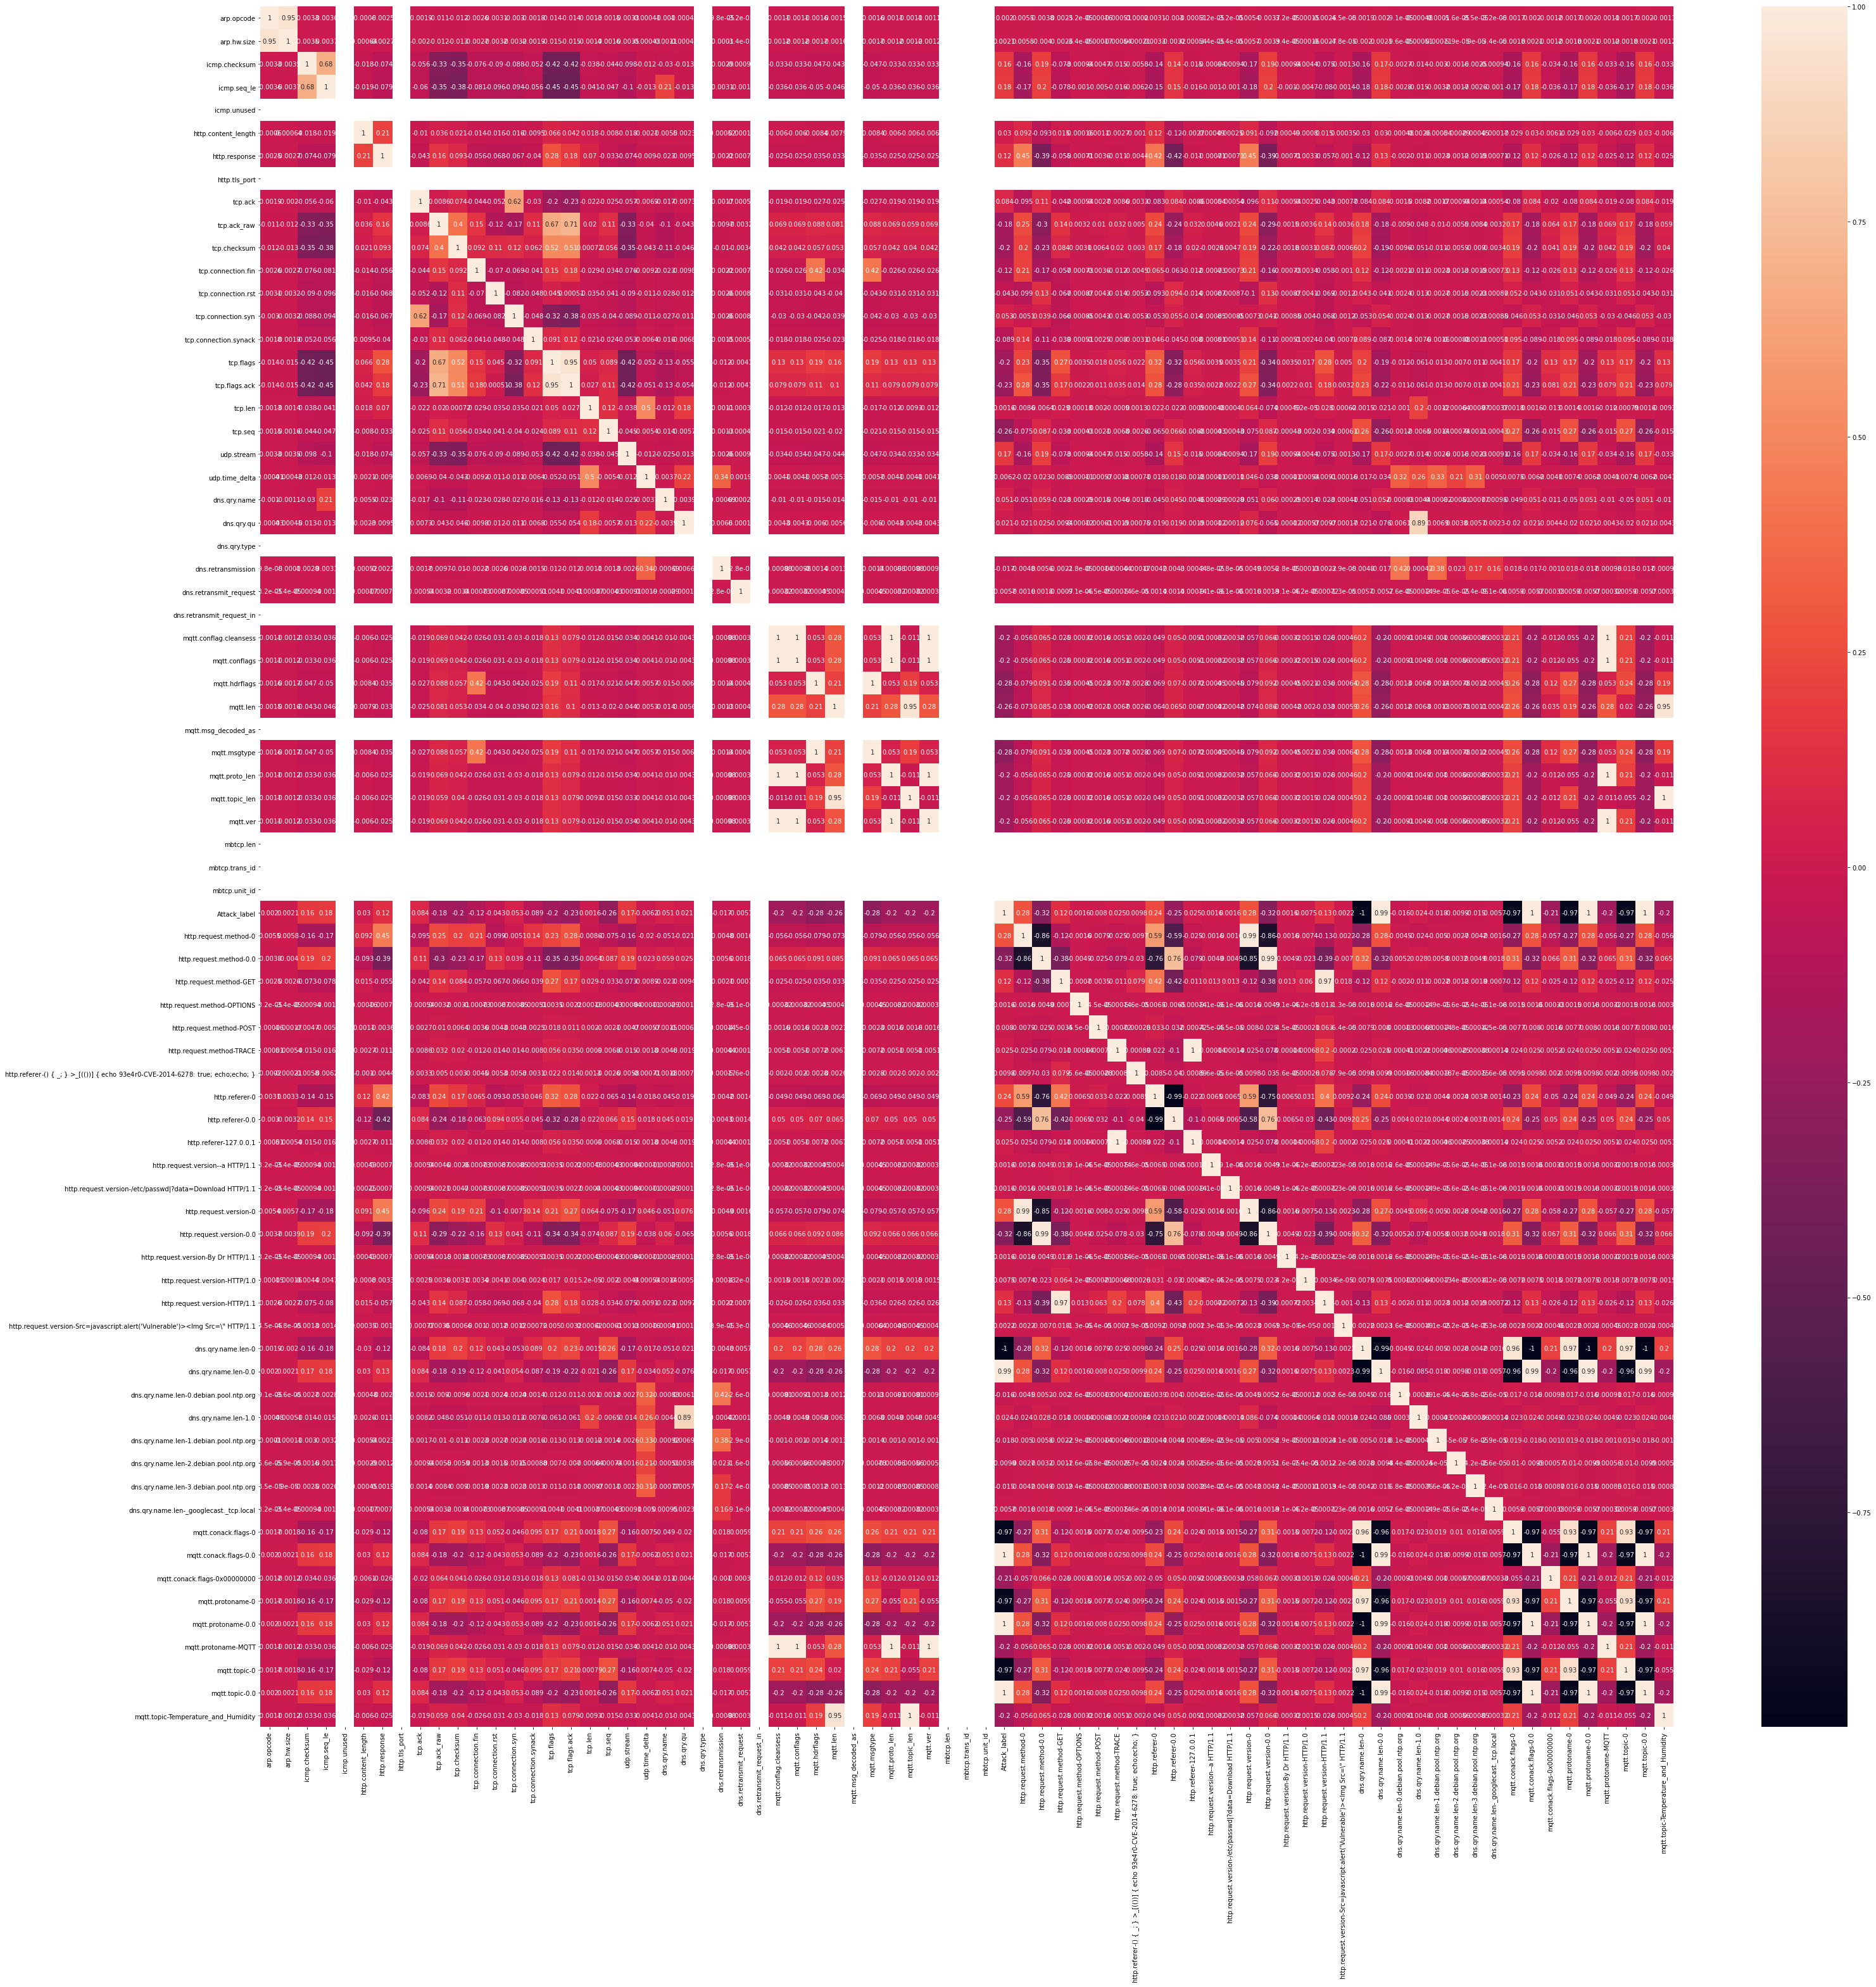

In [178]:
corr_matrix = df[feat_cols].corr()
fig = plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True)

In [179]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [180]:
df[skip_list[3]].value_counts()

0.0    110415
Name: mqtt.msg_decoded_as, dtype: int64

In [181]:
df.drop(skip_list, axis=1, inplace=True)
feat_cols = list(df.columns)
feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'http.content_length',
 'http.response',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-TRACE',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }',
 'http.referer-0',
 'http.referer-0.0',
 'http.referer-127.0.0.1',
 'http.reques

In [182]:
X = df.drop([label_col], axis=1)
y = df[label_col]

del df

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

del X
del y

In [184]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [185]:
label_encoder.classes_

array(['Backdoor', 'DDoS_ICMP', 'DDoS_UDP', 'MITM', 'Normal',
       'Port_Scanning', 'Ransomware', 'SQL_injection',
       'Vulnerability_scanner', 'XSS'], dtype=object)

In [186]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [187]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state = 0)  
classifier.fit(X_train, y_train)  

c:\Users\91884\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [188]:
y_pred = classifier.predict(X_test)  

In [189]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[1433    0    0    0    0   45  495    0    0    0]
 [   0 2590   29    0    0    0    0    0    0    0]
 [   0   13 2887    0    0    0    0    0    0    0]
 [   0    0    0   72    0    0    0    0    0    0]
 [   0    0    0    0 4820    0    0    0    0    0]
 [   0    0    1    0    0 1758   25    0    0    0]
 [1258    0    1    0    0   65  614    0    0    0]
 [   0    0    0    0    0    0    0 2056    0    0]
 [   0    0    0    0    0    0    0    0 1715  297]
 [   0    0    0    0    0    0    0    0  254 1655]]


In [191]:
# accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# print("The accuracy of the model is:",accuracy_score(y_test, y_pred)*100,"%")

0.887560566951954

In [192]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=15)

In [193]:
y_pred= classifier.predict(X_test) 

In [194]:
# accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# print("The accuracy of the model is:",accuracy_score(y_test, y_pred)*100,"%")

0.9644070099171308

In [215]:

from sklearn.ensemble import RandomForestClassifier


n_estimators = 5
max_depth = 5
max_features = 'sqrt'
random_state = 42
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                               max_features=max_features, random_state=random_state)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [216]:
accuracy_score(y_test, y_pred)

0.8612507358601639

In [211]:

from sklearn.tree import DecisionTreeClassifier


max_depth = 5
criterion = 'entropy'
random_state = 42
model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=random_state)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [212]:
accuracy_score(y_test, y_pred)

0.9216591948557714